# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


Text(0.5, 1.0, 'Plot of sqrt(x^2 + 5)')

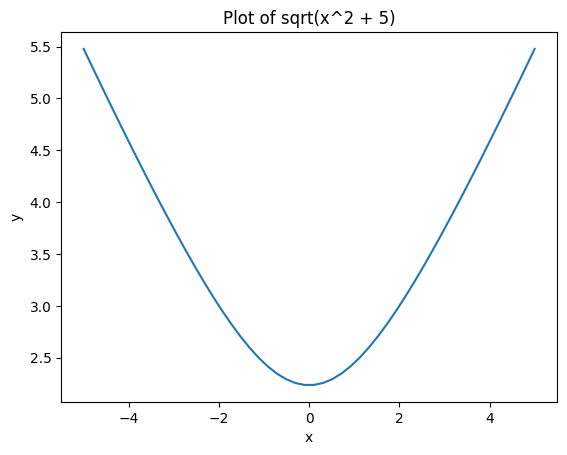

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
f = lambda x : np.sqrt(x**2 + 5)

# Plot the function f(x), np.linspace might be helpful.
x = np.linspace(-5, 5)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of sqrt(x^2 + 5)')


1.1159022395930293e-12


Text(0.5, 1.0, 'f(x_k) vs Iteration number')

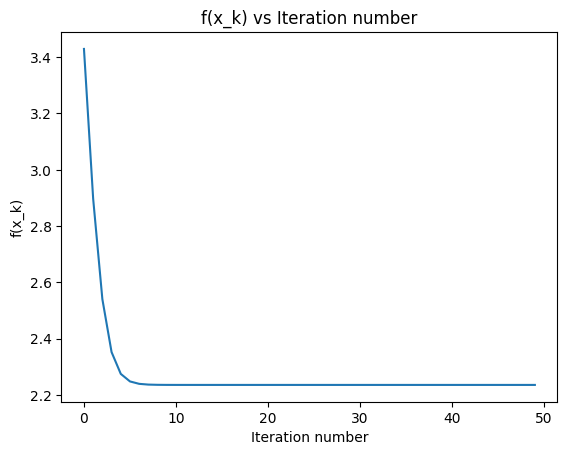

In [ ]:
# Define the derivative of the function f(x), for gradient descent
fprime = lambda x : x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def grad_descent(x_0, step_size, num_iterations):
    x_curr = x_0
    x_k = np.zeros(num_iterations)

    for k in range(num_iterations):
        x_k[k] = x_curr
        x_curr = x_curr - step_size * fprime(x_curr)

    return x_k

#set up/assign initial values
num_iterations = 50
step_size = 1
x_0 = (8 / 5) + 1

# Run gradient descent by calling the function
x_k = grad_descent(x_0, step_size, num_iterations)

#report x_T by printing out the value
print(x_k[-1])

#plot the f(x_k) values vs. iteration number
plt.plot(range(num_iterations), f(x_k))
plt.xlabel('Iteration number')
plt.ylabel('f(x_k)')
plt.title('f(x_k) vs Iteration number')


Text(0.5, 1.0, 'f(x_k-1) - f(x_k) vs Iteration number for different step sizes')

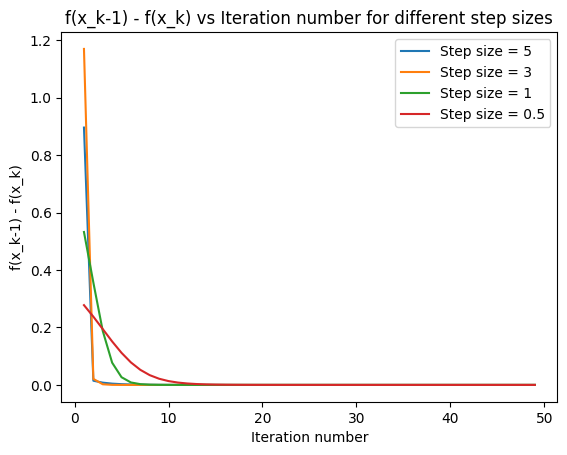

In [ ]:
#create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

#initialize a list to store the results from different step sizes
results = []

#loop through the step sizes and perform GD and record results
for step in step_sizes:
    results.append(grad_descent(x_0, step, num_iterations))

#FIXME
# plot multiple curves in a single graph
x = range(1, num_iterations)
for step, x_k in zip(step_sizes, results):
    diffs = [f(x_k[k-1]) - f(x_k[k]) for k in x]
    plt.plot(x, diffs, label=f'Step size = {step}')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('f(x_k-1) - f(x_k)')
plt.title('f(x_k-1) - f(x_k) vs Iteration number for different step sizes')

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.670728855983389
Coefficient for X1: 3.6834093832796997
Coefficient for X2: 0.053364225546002286


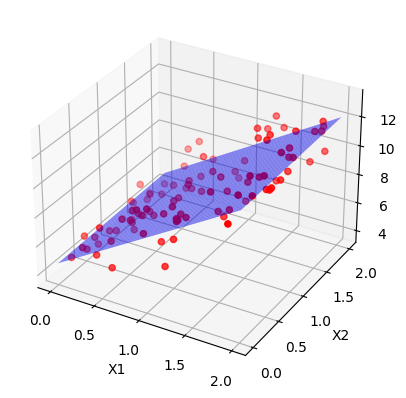

In [ ]:
#generate data
np.random.seed(88)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4*X[:,0] + 0.5*X[:,1] + np.random.randn(100)  # Generate y values with noise

#add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((100,1)), X]

#find theta with the normal equation
intercept, coeff1, coeff2 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#print the intercept and coefficients of the regression plane
print("Intercept:", intercept)
print("Coefficient for X1:", coeff1)
print("Coefficient for X2:", coeff2)

x1 = np.linspace(0, 2, 100)
x2 = np.linspace(0, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Y_pred = intercept + coeff1 * X1 + coeff2 * X2


#plot the data and regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Data Points')
ax.plot_surface(X1, X2, Y_pred, color='b', alpha=0.5, label='Regression Plane')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# plt.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Data Points')
# plt.plot_surface(X1, X2, Y_pred, color='b', alpha=0.5, label='Regression Plane')

# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.zlabel('Y')

plt.show()



## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [ ]:
#import numpy for using arrays and matplotlib for plotting data
import numpy as np
import matplotlib.pyplot as plt

#define the logistic sigmoid function
#   a sigmoid function's output is bounded between [0, 1], which means that it can be used to compute probabilities
#   the logistic function is a specific sigmoid function
#the logistic function is useful for binary classification since it monotonically increases wrt z and exhibits an "S" shape
#   this means that big negative z values are mapped to 0, small negative z values are mapped between (0, 0.5), 0 z is mapped to 0.5,
#   small positive z values are mapped to (0.5, 1), and large positie z values are mapped to 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#initialize the seed used to generate specific random values
np.random.seed(595)

#create a matrix with 2 rows and 100 columns that is filled with random numbers between (0,1)
X = np.random.rand(2, 100)

#parameterize the true probability distribution of this system (a function f)
#   the machine learning goal is to parameterize a model that approximates f
#   by successively iterating through data and updating weights and a bias
#define the weights, w1 and w2, used to compute z = <w, x> + b in this logistic regression
#define the bias, b, used to compute z = w^T x + b in this logistic regression
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

#use the logistic function to compute probabilities from the dataset
#   the weights and bias mold the shape of the S curve -- they establish its steepness
#       changing the w_true and b_true would thus change many, if not all, probability values
#   a dot product is used between a row of the input dataset and the weights to obtain a number in R^1
#       the bias term is also a scalar
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

#convert numbers to binary 0, 1 for classification
#   probabilities greater than 0.5 are 1 (aka True)
#   probabilities less than OR EQUAL TO 0.5 are 0 (aka False)
Y = (probabilities > 0.5).astype(int)

#perturb the input dataset so that it can be used to train the model
#   the Y values are not perturbed
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

#separate the training data from the test data
#   training x data uses all rows and the first 80 columns
#   testing x data uses all rows and all columns after the 80th
#   training y data uses the first 80 elements
#   testing y data uses all elements after the 80th
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

#initialize the parameters (2 weights, 1 bias) of this model
#   we want the shape of our approximate logistic curve to be as close as possible
#   to that of the true logistic curve (which is created with w_true and b_true)
w = np.zeros(X.shape[0])
b = 0.0

#initialize the hyperparameters of our training process
#   the learning rate is basically the step size of our gradient descent optimization algorithm
#   the number of epochs is the number of times that the dataset is "studied" by our "AI"
learning_rate = 0.1        #5.95
num_epochs = 1000       #595

#I added code to iterate through 1000 learning rates to find the best one
#   funnily enough, the best one turned out to be the first one in my set of possibilities
#   I do acknowledge that most of the learning rates in this set were far too large
# ideal_lr = 0
# max_test_accuracy = 0
# for learning_rate in np.linspace(0.1, 10.0, 1000):

#have the algorithm go over the training data set num_epochs number of times
#   if the ML algorithm is studying for an exam called the "test" then the number of epochs
#   is the number of times that the algorithm studies the "train"
#       the goal is for the algorithm to pass the "test",
#       so obtaining a higher test accuracy is more important than a high "train" accuracy
for epoch in range(num_epochs):
    #obtain probabilities that convey what the model currently predicts,
    #based on the training data that it is studying
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    #differentiate the Jacobian with respect to each parameter
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    #use gradient descent to slightly alter the parameters of this model
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

#obtain the model's probability predictions and binary classifications for the "homework it was studying" called the training dataset
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

#obtain the model's probability predictions and binary classifications for the "final exam" called the testing dataset
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

#compute the average accuracy of the model from the training data and test data
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

# if (test_accuracy > max_test_accuracy):
#     max_test_accuracy = test_accuracy
#     ideal_lr = learning_rate

#print(f"Learning rate: {learning_rate}")

#print out the final training set accuracy and test set accuracy
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# print(f"Ideal test set accuracy: {max_test_accuracy}")
# print(f"Ideal learning rate: {ideal_lr}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


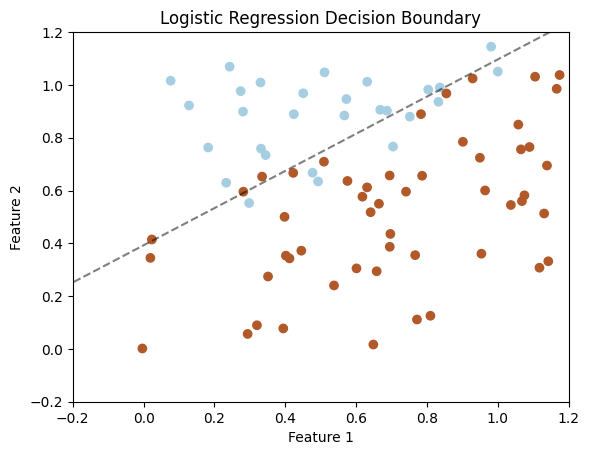

In [ ]:
#create a scatter plot of the learned decision boundary applied to the training data
#   blue are the first row
#   red are the second row
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

#get the axis
ax = plt.gca()

#the following code plots the decision boundary
#get the size of the plot's x-axis and y-axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#create a grid of points for the contour plot
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
#compute the decision boundary by applying the logistic regression
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
#plot the computed decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

#create labels and a title for the graph, then display it
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

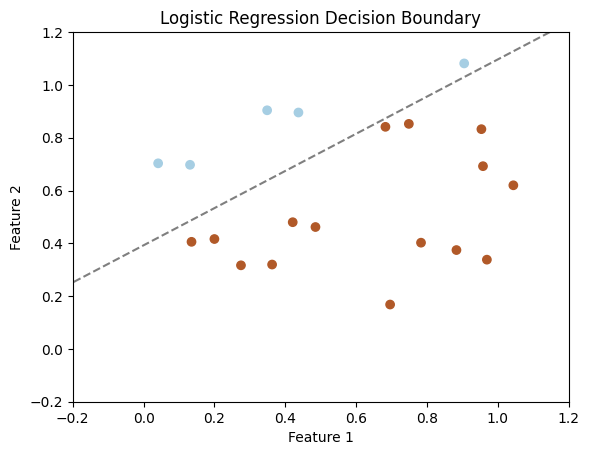

In [ ]:
#create a scatter plot of the learned decision boundary applied to the test data
#   blue are the first row
#   red are the second row
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

#get the axis
ax = plt.gca()

#the following code plots the decision boundary
#get the size of the plot's x-axis and y-axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#create a grid of points for the contour plot
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
#compute the decision boundary by applying the logistic regression
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
#plot the computed decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

#create labels and a title for the graph, then display it
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)